# Read in CDC data

Here are the links I used to download the data:

* [Te-W](https://data.cdc.gov/resource/9bhg-hcku.csv?$where=`group`=%27By%20Month%27%20and`state`!=%27United%20States%27%20and%20start_date%3E%272020-06-01%27and%20start_date%3C%272021-01-01%27%20and%20sex=%27All%20Sexes%27%20and%20age_group%20!=%20%27All%20Ages%27%20and%20state%20%3E%27South%20Dakota%27)

* [Or-Te](https://data.cdc.gov/resource/9bhg-hcku.csv?$where=`group`=%27By%20Month%27%20and`state`!=%27United%20States%27%20and%20start_date%3E%272020-06-01%27and%20start_date%3C%272021-01-01%27%20and%20sex=%27All%20Sexes%27%20and%20age_group%20!=%20%27All%20Ages%27%20and%20state%20%3E=%27Oregon%27%20and%20state%20%3C%20%27Tennessee%27)

* [Ne-Or](https://data.cdc.gov/resource/9bhg-hcku.csv?$where=`group`=%27By%20Month%27%20and`state`!=%27United%20States%27%20and%20start_date%3E%272020-06-01%27and%20start_date%3C%272021-01-01%27%20and%20sex=%27All%20Sexes%27%20and%20age_group%20!=%20%27All%20Ages%27%20and%20state%20%3E=%27Nevada%27%20and%20state%20%3C%20%27Oregon%27)

* [Ma-Ne](https://data.cdc.gov/resource/9bhg-hcku.csv?$where=`group`=%27By%20Month%27%20and`state`!=%27United%20States%27%20and%20start_date%3E%272020-06-01%27and%20start_date%3C%272021-01-01%27%20and%20sex=%27All%20Sexes%27%20and%20age_group%20!=%20%27All%20Ages%27%20and%20state%20%3E=%27Maine%27%20and%20state%20%3C%20%27Nevada%27)

* [Ge-Ma](https://data.cdc.gov/resource/9bhg-hcku.csv?$where=`group`=%27By%20Month%27%20and`state`!=%27United%20States%27%20and%20start_date%3E%272020-06-01%27and%20start_date%3C%272021-01-01%27%20and%20sex=%27All%20Sexes%27%20and%20age_group%20!=%20%27All%20Ages%27%20and%20state%20%3E=%27Georgia%27%20and%20state%20%3C%20%27Maine%27)

* [A-Fl](https://data.cdc.gov/resource/9bhg-hcku.csv?$where=`group`=%27By%20Month%27%20and`state`!=%27United%20States%27%20and%20start_date%3E%272020-06-01%27and%20start_date%3C%272021-01-01%27%20and%20sex=%27All%20Sexes%27%20and%20age_group%20!=%20%27All%20Ages%27%20and%20state%20%3C=%27Florida%27)


In [1]:
import pandas as pd
import glob

In [2]:
files = glob.glob("state*.csv")
files

['states-A-FL.csv',
 'states-Tenn-Wyom.csv',
 'states-Ge-Mai.csv',
 'states-Mai-Nev.csv',
 'states-Nev-Org.csv',
 'states-Org-Ten.csv']

In [3]:
df = pd.concat([ pd.read_csv(f) for f in files], ignore_index=True)

# Rank without normalization

In [4]:
age_groups = [ '0-17 years', '18-29 years', '30-39 years',
       '40-49 years',  '50-64 years', '65-74 years', '75-84 years', '85 years and over' ] 

In [5]:
states0 = df[df.age_group.isin(age_groups)].groupby('state').covid_19_deaths.sum()
top10 = states0.sort_values(ascending=False).head(10).index
states0.sort_values(ascending=False).head(10)

state
Texas             30093.0
California        26916.0
Florida           18080.0
Ohio              12168.0
Pennsylvania      11213.0
Illinois          10044.0
Georgia            7769.0
Arizona            7407.0
North Carolina     7270.0
Tennessee          7250.0
Name: covid_19_deaths, dtype: float64

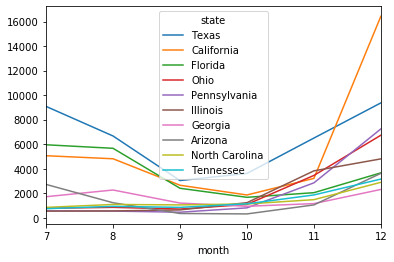

In [6]:
df.groupby(['month','state']).covid_19_deaths.sum().unstack('state')[top10].plot()

# Read in State Population

In [7]:
pop = pd.read_csv('population-est2019-agesex-civ.csv')

In [8]:
pop.columns = [ col.lower() for col in pop.columns] 

In [9]:
pop.columns

Index(['sumlev', 'region', 'division', 'state', 'name', 'sex', 'age',
       'estbase2010_civ', 'popest2010_civ', 'popest2011_civ', 'popest2012_civ',
       'popest2013_civ', 'popest2014_civ', 'popest2015_civ', 'popest2016_civ',
       'popest2017_civ', 'popest2018_civ', 'popest2019_civ'],
      dtype='object')

In [10]:
ages = df.age_group.unique()
ages

array(['Under 1 year', '0-17 years', '1-4 years', '5-14 years',
       '15-24 years', '18-29 years', '25-34 years', '30-39 years',
       '35-44 years', '40-49 years', '45-54 years', '50-64 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

In [11]:
start_ages = [ 0,0,1,5,15,18,25,30,35,40,45,50,55,65,75,85]
end_ages =   [ 0,17,4,14,24,29,34,39,44,49,54,64,64,74,84,86]

In [13]:
idx = (pop.sumlev == 40) & (pop.sex==0)
pop_by_age = {}
for bracket, s,e in zip(ages,start_ages,end_ages):
    print( "{} : age >= {} and age <= {}".format( bracket,s,e))
    pop_by_age[bracket] = pop[idx & (pop.age >= s) & (pop.age <= e)].groupby('name').popest2019_civ.sum().to_dict()


Under 1 year : age >= 0 and age <= 0
0-17 years : age >= 0 and age <= 17
1-4 years : age >= 1 and age <= 4
5-14 years : age >= 5 and age <= 14
15-24 years : age >= 15 and age <= 24
18-29 years : age >= 18 and age <= 29
25-34 years : age >= 25 and age <= 34
30-39 years : age >= 30 and age <= 39
35-44 years : age >= 35 and age <= 44
40-49 years : age >= 40 and age <= 49
45-54 years : age >= 45 and age <= 54
50-64 years : age >= 50 and age <= 64
55-64 years : age >= 55 and age <= 64
65-74 years : age >= 65 and age <= 74
75-84 years : age >= 75 and age <= 84
85 years and over : age >= 85 and age <= 86


In [14]:
import pickle
with open("pop_by_age.pickle", "wb") as fp:
    pickle.dump(pop_by_age,fp)

# Adjust deaths

In [15]:
df.columns

Index(['data_as_of', 'start_date', 'end_date', 'group', 'year', 'month',
       'state', 'sex', 'age_group', 'covid_19_deaths', 'total_deaths',
       'pneumonia_deaths', 'pneumonia_and_covid_19_deaths', 'influenza_deaths',
       'pneumonia_influenza_or_covid', 'footnote'],
      dtype='object')

In [16]:
def deaths_per_capita(row):
    state, age, n = row
    age_pop = pop_by_age[age]
    if state in age_pop:
        return n / age_pop[state] *100000
    

In [17]:
df['covid_deaths_per_capita'] = df [['state','age_group', 'covid_19_deaths']].apply(deaths_per_capita,axis=1)

# Rank States

In [94]:
old = ranking.new

In [18]:
states = df[df.age_group.isin(age_groups)].groupby('state').covid_deaths_per_capita.sum().sort_values(ascending=False)
top11 = states.head(11).index
low10 = states.tail(12).head(10).index

In [26]:
ranking = states.to_frame().reset_index()
ranking

,state,covid_deaths_per_capita
0,North Dakota,4847.988138
1,South Dakota,4648.564650
2,Iowa,3276.070665
3,Mississippi,3131.383711
4,Arkansas,3056.064239
5,Oklahoma,3034.244507
6,Indiana,2989.180628
7,Texas,2854.331317
8,Kansas,2853.811633
9,Missouri,2847.149788


In [169]:
ranking = pd.concat([states,old,_61],axis=1,sort=True)
ranking.columns = ['new', 'old1', 'old2']
ranking.sort_values('new',ascending=False).reset_index()

,index,new,old1,old2
0,North Dakota,4847.988138,179.461542,179.461542
1,South Dakota,4648.564650,203.214336,203.214336
2,Iowa,3276.070665,114.980098,127.971829
3,Mississippi,3131.383711,470.865679,563.718585
4,Arkansas,3056.064239,1102.002730,1254.337309
5,Oklahoma,3034.244507,292.097123,336.137516
6,Indiana,2989.180628,102.800966,113.514687
7,Texas,2854.331317,2034.990670,2439.042403
8,Kansas,2853.811633,93.686725,104.724906
9,Missouri,2847.149788,104.417650,118.353892


Text(0.5, 1.0, '2021 Covid deaths, age normalized')

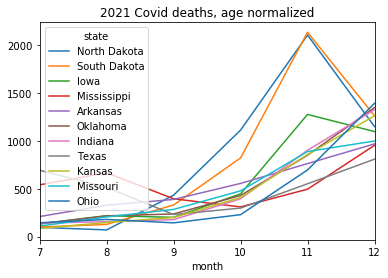

In [21]:
ax = df.groupby(['month','state']).covid_deaths_per_capita.sum().unstack('state')[top11].plot()
ax.set_title('2021 Covid deaths, age normalized')

In [22]:
low10 = list(low10)
low10.append('Florida')

Text(0.5, 1.0, '2021 Covid deaths, age normalized')

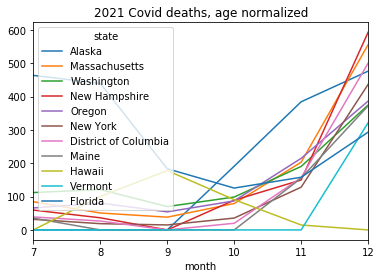

In [23]:
ax = df.groupby(['month','state']).covid_deaths_per_capita.sum().unstack('state')[low10].plot()
ax.set_title('2021 Covid deaths, age normalized')

In [24]:
df.groupby(['month','state']).covid_deaths_per_capita.sum().unstack('state')[low10]

state,Alaska,Massachusetts,Washington,New Hampshire,Oregon,New York,District of Columbia,Maine,Hawaii,Vermont,Florida
month,,,,,,,,,,,
7,0.000000,84.519921,112.080726,59.521841,65.924302,31.715385,39.017839,35.502959,0.000000,0.000000,463.650599
8,0.000000,50.751883,121.122397,36.374459,80.596698,18.748210,26.636716,0.000000,100.496075,0.000000,439.694725
9,0.000000,38.219928,70.009363,0.000000,54.160123,14.909444,0.000000,0.000000,178.155974,0.000000,183.596264
10,191.188686,79.244538,98.664334,89.173241,87.048258,35.535879,19.912782,0.000000,90.804924,0.000000,125.586253
11,384.519965,203.140163,190.472674,149.787586,214.750599,128.262346,156.718230,155.466737,14.727935,0.000000,158.022594
12,476.395094,555.930699,374.883567,593.142380,386.593714,436.719590,500.536652,372.196693,0.000000,321.546422,293.466458


In [107]:
df.age_group.unique()

array(['Under 1 year', '0-17 years', '1-4 years', '5-14 years',
       '15-24 years', '18-29 years', '25-34 years', '30-39 years',
       '35-44 years', '40-49 years', '45-54 years', '50-64 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

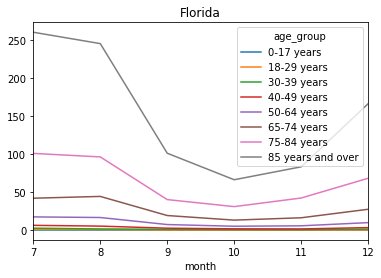

In [25]:
df[ (df.state=='Florida') & (df.age_group.isin(age_groups))] \
      .groupby(['month','age_group']).covid_deaths_per_capita.sum().unstack('age_group').plot(title='Florida')

In [28]:
by_age = df[df.age_group.isin(age_groups)].groupby(['state','age_group']).covid_deaths_per_capita.sum().unstack('age_group')
by_age.loc[ranking.state,:] #.sort_values('18-29 years', ascending=False)


age_group,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years,85 years and over
state,,,,,,,,
North Dakota,0.000000,0.000000,0.000000,0.000000,84.005250,327.013081,1088.221601,3348.748206
South Dakota,0.000000,0.000000,0.000000,10.498137,91.755303,338.504304,1005.519558,3202.287348
Iowa,0.000000,0.000000,0.000000,10.256012,57.680991,199.712953,716.685193,2291.735516
Mississippi,0.000000,0.000000,15.060605,34.734867,121.774479,341.575678,784.515952,1833.722131
Arkansas,0.000000,0.000000,2.619412,26.970441,86.522027,257.571104,689.458300,1992.922954
Oklahoma,0.000000,0.000000,6.114841,28.358047,96.005180,306.208396,724.656462,1872.901582
Indiana,0.000000,0.000000,2.699014,13.989344,59.609179,212.489615,667.113296,2033.280181
Texas,0.175682,3.377593,11.670066,38.956985,122.189005,331.220813,726.260292,1620.480881
Kansas,0.000000,0.000000,0.000000,14.490741,61.302338,210.479143,697.811344,1869.728067


In [29]:
fld = {}
for col in by_age.columns:
    tmp = by_age.sort_values(col,ascending=False).reset_index()
    fld[col] = tmp [ tmp.state == 'Florida'][col].values[0]


In [30]:
fl = {}
for col in by_age.columns:
    tmp = by_age.sort_values(col,ascending=False).reset_index()
    fl[col] = tmp [ tmp.state == 'Florida'].index[0]

fl_df = pd.concat ( [pd.DataFrame.from_dict(fl,orient='index', columns=['Fl_rank']), 
             pd.DataFrame.from_dict(fld,orient='index', columns=['Fl_deaths']), 
                     by_age.median(),
             by_age.max() ],
           axis=1)

fl_df.columns = [ 'Fl_rank Fl_death median max'.split()]
fl_df

,Fl_rank,Fl_death,median,max
age_group,,,,
0-17 years,36,0.000000,0.000000,0.175682
18-29 years,3,1.248034,0.000000,3.377593
30-39 years,5,6.345571,0.000000,18.870508
40-49 years,13,19.102086,8.133735,38.956985
50-64 years,19,60.380175,47.085348,122.189005
65-74 years,26,160.827852,160.827852,341.575678
75-84 years,35,377.383465,456.758542,1088.221601
85 years and over,36,921.655023,1263.010457,3348.748206


Influenza Deaths per 100,000 population: 1.8

Influenza and pneumonia deaths

    Number of deaths: 49,783
    Deaths per 100,000 population: 15.2

In [40]:
fl_pop = []
for grp in age_groups:
    fl_pop.append (pop_by_age[grp]['Florida'])
    
fl_pop = pd.DataFrame(fl_pop, index=age_groups,columns= ['FL'])
fl_pop

,FL
0-17 years,4229919
18-29 years,3124914
30-39 years,2694793
40-49 years,2596575
50-64 years,4266301
65-74 years,2465369
75-84 years,1450514
85 years and over,581454


In [34]:
tmp = pd.concat( [fl_pop.FL , fl_pop.cumsum()],axis=1) / fl_pop.FL.sum()*100
tmp.columns = ['Fl %', 'FL cumulative']
tmp

,Fl %,FL cumulative
0-17 years,19.756893,19.756893
18-29 years,14.595691,34.352584
30-39 years,12.586704,46.939288
40-49 years,12.127952,59.067240
50-64 years,19.926824,78.994064
65-74 years,11.515122,90.509186
75-84 years,6.774988,97.284174
85 years and over,2.715826,100.000000


# Leading cause of deaths

In [41]:
us_pop = 329.5 * 1000 * 1000

deaths = [659041, 599601, 173040, 156979, 150005, 121499, 87647, 51565, 49783, 47551 ]
causes = 'heart cancer accidents respiratory stroke alzheimers diabetes nepritis influenza_pneumonia suicide'.split()

pd.DataFrame(deaths, index=causes, columns=['deaths']) / us_pop /2 * 100000

,deaths
heart,100.006222
cancer,90.986495
accidents,26.257967
respiratory,23.820789
stroke,22.762519
alzheimers,18.436874
diabetes,13.300000
nepritis,7.824734
influenza_pneumonia,7.554325
suicide,7.215630
